In [10]:
import numpy as np
x = np.array([1.0,0.0,3.0,4.0,5.0,6.0,7.0,1.0,0.11,1.202,3.03,4.04,5.05,6.06,7.07])
y = np.array([0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0])

In [3]:
x_new = [2.0,3.0,8.0,9.0]
y_new = [0.0,0.0,1.0,1.0]

Let's go through the **full, detailed step-by-step derivative** for linear regression with Mean Squared Error (MSE) loss. We'll use the simple case of one feature per example, so the model is:

$$
\hat{y}_i = w x_i + b
$$

The loss function is:
$$
L(w, b) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{n} \sum_{i=1}^n (w x_i + b - y_i)^2
$$

## 1. **Compute gradient w.r.t weight (w):**
We need:
$$
\frac{\partial L}{\partial w}
$$
Let's expand the loss:
$$
L(w, b) = \frac{1}{n} \sum_{i=1}^n (w x_i + b - y_i)^2
$$
Apply the derivative step-by-step:

- The inside term is $$w x_i + b - y_i$$.
- Its derivative w.r.t $$w$$ is $$x_i$$.
- By chain rule:
$$
\frac{\partial}{\partial w}(w x_i + b - y_i)^2 = 2 (w x_i + b - y_i) \cdot \frac{\partial}{\partial w}(w x_i + b - y_i) = 2 (w x_i + b - y_i) x_i
$$

- Now sum over all samples and normalize:
$$
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n 2 (w x_i + b - y_i) x_i = \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) x_i
$$

## 2. **Compute gradient w.r.t bias (b):**
Same process:

- The inside has derivative w.r.t $$b$$ is 1, so:
$$
\frac{\partial}{\partial b}(w x_i + b - y_i)^2 = 2 (w x_i + b - y_i) \cdot 1
$$
So,
$$
\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^n 2 (w x_i + b - y_i) = \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
$$

## 3. **Summary table**

| Parameter | Gradient Formula |
|-----------|:----------------|
| $$w$$     | $$\frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)x_i$$ |
| $$b$$     | $$\frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)$$ |

These gradients are used in gradient descent:
- Update $$w$$: $$w = w - \alpha \frac{\partial L}{\partial w}$$
- Update $$b$$: $$b = b - \alpha \frac{\partial L}{\partial b}$$
where $$\alpha$$ is the learning rate.

***

**Ready to try the derivation yourself for the multivariate (multiple feature) case? Or want a hands-on example with real numbers? Let me know which you'd like to practice next!**

[1](file:///C:/Users/damod/Downloads/Supervised%20(1).pdf)

 Parameter | Gradient Formula |
|-----------|:----------------|
| $$w$$     | $$\frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)x_i$$ |
| $$b$$     | $$\frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)$$ |


In [4]:
def gradient_w(x,y,y_pred):
    grad = 0
    n = len(y)
    for i in range(n):
        grad += (y_pred[i]-y[i])*x[i]
    grad = (2/n)*grad
    return grad
def gradient_B(y,y_pred):
    grad = 0
    n = len(y)
    for i in range(n):
        grad+=(y_pred[i]-y[i])
    grad = (2/n)*grad
    return grad

In [ ]:
def compute_loss(y_pred,y):
    # mean squared error
    loss=0
    for i in range(len(y)):
        loss+=(y_pred[i]-y[i])**2
    loss=loss/len(y)
    return loss

In [13]:
w = 0.001
b = 0.0001
learning_rate=0.01

for epoch in range(100):
    y_pred=[]
    for i in range(len(x)):
        y_pred.append(w*x[i]+b)
    loss = compute_loss(y_pred,y)
    grad_w = gradient_w(x,y,y_pred)
    grad_b = gradient_B(y,y_pred)
    w = w - learning_rate * grad_w
    b = b-learning_rate * grad_b

for i in range(len(x_new)):
    y_new_pred = w*x_new[i]+b
    print(f"for x={x_new[i]}, predicted y={0 if y_new_pred < 0.5 else 1}, actual y={y_new[i]}")
    

for x=2.0, predicted y=0, actual y=0.0
for x=3.0, predicted y=0, actual y=0.0
for x=8.0, predicted y=1, actual y=1.0
for x=9.0, predicted y=1, actual y=1.0


# Linear Regression Derivation Practice

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self,learning_rate,iteration):
        self.learning_rate = learning_rate
        self.iteration = iteration 
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self,x,y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        for i in range(self.iteration):
            y_pred = np.dot(x, self.weights) + self.bias
            
            # root mse
            cost = (1/(2*n_samples)*np.sum(y_pred-y)**2)
            self.cost_history.append(cost)
            dw = (1/n_samples) * (np.sum(x * (y_pred-y)))
            db = (1/n_samples) * np.sum(y_pred-y)
            self.weights = self.weights-self.learning_rate*dw
            self.bias = self.bias-self.learning_rate*db
    
    def predict(self,x):
        return np.dot(x,self.weights) + self.bias

    def plot_cost_history(self):
        plt.plot(self.cost_history)
        plt.title('Cost Function Over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()

In [58]:
np.random.seed(42)
x = np.random.randn(100)
print(x.shape)
y = 2 * x.flatten()
print(y.shape)

(100,)
(100,)


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Reshape x to 2D for train_test_split and model
x_reshaped = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.2)

model = LinearRegression(learning_rate=0.01, iteration=200)
model.fit(x=x_train, y=y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


MSE: 0.4204
R² Score: 0.8647
Learned weights: [1.28923507]
Learned bias: -0.1065


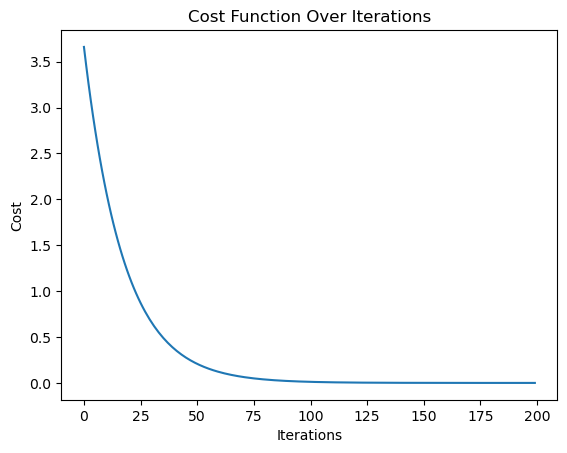

In [63]:
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Learned weights: {model.weights}")
print(f"Learned bias: {model.bias:.4f}")
model.plot_cost_history()

Logistic Regression

In [65]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [84]:
class LogisticRegression:
    def __init__(self,iteration=50 , learning_rate=0.01) -> None:
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.weight = None
        self.bias = None
        self.cost_history = []
        
    def _add_intercept(self,x):
        intercept = np.ones((x.shape[0],1))
        return np.concatenate((intercept,x),axis=1)
    
    def _sigmoid(self,z):
        z = np.clip(z,-250,250)
        return 1/(1 + np.exp(-z))
    
    def fit(self,x,y):
        x = self._add_intercept(x)
        self.weight = np.zeros(x.shape[1])
        
        for i in range(self.iteration):
            # forward pass
            z = np.dot(x,self.weight)
            p = self._sigmoid(z)
            loss = (-(y*np.log(p)  + (1-y)*np.log(1-p))).mean()
            self.cost_history.append(loss)
            gradient = np.dot(x.T, (p - y)) / y.size
            self.weight = self.weight - self.learning_rate*gradient
            
    def predict_proba(self,x):
        x = self._add_intercept(x)
        z = np.dot(x,self.weight)
        return self._sigmoid(z)
        
    def predict(self,x,threshold=0.5):
        return (self.predict_proba(x)>=threshold).astype(int)

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                            n_informative=2, random_state=42, n_clusters_per_class=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(learning_rate=0.1, iteration=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"\\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9000
\nClassification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

\nConfusion Matrix:
[[97  7]
 [13 83]]


In [4]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [ ]:
flowchart TD
    %% Initialization and Fitting
    A([DecisionTree __init__])
    A --> B([fit(X, y)])
    B --> C([_build_tree(X, y, depth=0)])

    %% Recursive Tree Building
    C --> D{Stopping Condition?<br/>(depth ≥ max_depth<br/>OR min_samples_split<br/>OR pure node)}
    D -- Yes --> E([Return Most Common Class])
    D -- No --> F([_best_split(X, y)])
    F --> G([For each feature and threshold:<br/>Compute left/right split<br/>Skip invalid splits<br/>Calculate information gain])
    G --> H{Best Gain == 0?}
    H -- Yes --> E
    H -- No --> I([Build Node:<br/>Set feature, threshold, left, right])
    I --> J([left_mask = X[:, feature] ≤ threshold])
    I --> K([right_mask = ~left_mask])
    J --> L([Recurse Left: _build_tree(left split)])
    K --> M([Recurse Right: _build_tree(right split)])
    L -.-> I
    M -.-> I
    I --> N([Return Node Dict])

    %% Predicting
    B -.-> O([predict(X)])
    O --> P([For each sample, call _predict_sample(...)])
    P --> Q{Is node dict?}
    Q -- No (Leaf) --> R([Return class label])
    Q -- Yes (Internal Node) --> S{sample[node['feature']] ≤ node['threshold']}
    S -- True --> T([Go left: _predict_sample(left)])
    S -- False --> U([Go right: _predict_sample(right)])
    T --> Q
    U --> Q

    %% Printing Tree
    B -.-> V([print_tree()])
    V --> W{Is node dict?}
    W -- No (Leaf) --> X([Print "Class: &lt;label&gt;"])
    W -- Yes --> Y([Print feature, threshold<br/>→ Recurse left/right with indent])
    Y --> V

    %% Utility Functions
    subgraph "Utility Functions"
        F -.-> AA([_information_gain:<br/>Gini Impurity = parent_impurity - weighted children])
        F -.-> AB([_gini_impurity:<br/>1 - Σ(p²)])
    end

    %% Style (visual grouping)
    style C fill:#f9f,stroke:#333,stroke-width:2px
    style D fill:#ffc,stroke:#333,stroke-width:2px
    style F fill:#9ff,stroke:#333,stroke-width:2px
    style I fill:#cfc,stroke:#333,stroke-width:2px
    style E fill:#aff,stroke:#333,stroke-width:2px
    style O fill:#fdd,stroke:#333,stroke-width:2px
    style V fill:#eef,stroke:#333,stroke-width:2px
    style AA fill:#eee,stroke:#333,stroke-width:1px
    style AB fill:#eee,stroke:#333,stroke-width:1px


In [6]:
X, y = make_classification(n_samples=200, n_features=4, n_redundant=0, 
                            n_informative=4, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
dt = DecisionTree(max_depth=3, min_samples_split=5)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Print tree structure
print("\\nTree Structure:")
dt.print_tree()

Accuracy: 0.7500
\nTree Structure:
Feature 3 <= -1.27
├── True:
  Feature 0 <= 0.02
  ├── True:
    Feature 0 <= -1.65
    ├── True:
      Class: 0
    └── False:
      Class: 0
  └── False:
    Feature 0 <= 0.47
    ├── True:
      Class: 1
    └── False:
      Class: 0
└── False:
  Feature 0 <= -0.21
  ├── True:
    Feature 2 <= 0.38
    ├── True:
      Class: 1
    └── False:
      Class: 0
  └── False:
    Feature 1 <= 1.82
    ├── True:
      Class: 1
    └── False:
      Class: 0
